In [ ]:
!pip3 install face_recognition

: 

In [3]:
import face_recognition
import time
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def mostrar_img(img):
    plt.imshow(img)
    plt.axis("off")  # Ocultar los ejes
    plt.show()

In [ ]:

# Load the jpg files into numpy arrays
tiempo_open_img = []
inicio_tiempo = time.time()
biden_image = face_recognition.load_image_file("biden.jpg")
tiempo_open_img.append(time.time() - inicio_tiempo)
mostrar_img(biden_image)
inicio_tiempo = time.time()
obama_image = face_recognition.load_image_file("obama.jpg")
tiempo_open_img.append(time.time() - inicio_tiempo)
mostrar_img(obama_image)
inicio_tiempo = time.time()
unknown_image = face_recognition.load_image_file("obama2.jpg")
tiempo_open_img.append(time.time() - inicio_tiempo)
mostrar_img(unknown_image)
print(f"Tiempo promedio de lectura: {np.mean(tiempo_open_img)}")



In [ ]:
tiempo_encoding = []
biden_face_encoding = face_recognition.face_encodings(biden_image)[0]
tiempo_encoding.append(time.time() - inicio_tiempo)
inicio_tiempo = time.time()
obama_face_encoding = face_recognition.face_encodings(obama_image)[0]
tiempo_encoding.append(time.time() - inicio_tiempo)
inicio_tiempo = time.time()
unknown_face_encoding = face_recognition.face_encodings(unknown_image)[0]
tiempo_encoding.append(time.time() - inicio_tiempo)
    
print(f"Tiempo promedio de encoding: {np.mean(tiempo_encoding)}")


In [7]:
print(biden_face_encoding)
print(obama_face_encoding)
print(unknown_face_encoding)

[ 0.00212634  0.18151696  0.08942953 -0.02890662 -0.13226929  0.04053921
 -0.03351216 -0.07746185  0.05412482 -0.05690686  0.24183109 -0.05402808
 -0.25743544 -0.05157363  0.06138313  0.12605764 -0.14946274 -0.06552805
 -0.20102572 -0.06235627 -0.01103389 -0.0410016   0.02593715 -0.07272571
 -0.20662072 -0.23533899 -0.04712093 -0.1022827  -0.02789485 -0.16243912
  0.07824211 -0.03084383 -0.14441712 -0.05164247 -0.04710121 -0.0298584
 -0.01722826 -0.05847342  0.13154459  0.0262634  -0.17892288  0.13025905
  0.0073351   0.21587208  0.29474819 -0.00523595  0.04717013 -0.08853557
  0.13626243 -0.24181861  0.05437332  0.03498961  0.16807069  0.05769813
  0.14244418 -0.0731723   0.02392231  0.18972901 -0.200625    0.03737672
  0.05043876 -0.05482149  0.03411502 -0.04349234  0.12301472  0.11024218
 -0.009777   -0.09036201  0.19369094 -0.09519793 -0.11277228  0.03078757
 -0.06616243 -0.12772179 -0.33526269  0.00107876  0.27036449  0.1360216
 -0.29611111 -0.07562292 -0.04549194  0.00518049  0.0

In [9]:
known_faces = [
    biden_face_encoding,
    obama_face_encoding
]

# results is an array of True/False telling if the unknown face matched anyone in the known_faces array
inicio_tiempo = time.time()
results = face_recognition.compare_faces(known_faces, unknown_face_encoding)
elapsed_time = time.time() - inicio_tiempo
print(f"Tiempo de comparacion: {elapsed_time}")

print("Is the unknown face a picture of Biden? {}".format(results[0]))
print("Is the unknown face a picture of Obama? {}".format(results[1]))
print("Is the unknown face a new person that we've never seen before? {}".format(not True in results))

Tiempo de comparacion: 0.00016832351684570312
Is the unknown face a picture of Biden? False
Is the unknown face a picture of Obama? True
Is the unknown face a new person that we've never seen before? False


In [10]:
for i in np.arange(0, 1.1, 0.1):
    inicio_tiempo = time.time()
    results = face_recognition.compare_faces(known_faces, unknown_face_encoding, i)
    elapsed_time = time.time() - inicio_tiempo
    print(f"Tiempo de comparacion: {elapsed_time} para i = {i}")
    print(results)
    

Tiempo de comparacion: 8.487701416015625e-05 para i = 0.0
[False, False]
Tiempo de comparacion: 4.7206878662109375e-05 para i = 0.1
[False, False]
Tiempo de comparacion: 2.5272369384765625e-05 para i = 0.2
[False, False]
Tiempo de comparacion: 2.193450927734375e-05 para i = 0.30000000000000004
[False, False]
Tiempo de comparacion: 2.09808349609375e-05 para i = 0.4
[False, True]
Tiempo de comparacion: 2.0265579223632812e-05 para i = 0.5
[False, True]
Tiempo de comparacion: 2.7418136596679688e-05 para i = 0.6000000000000001
[False, True]
Tiempo de comparacion: 2.1219253540039062e-05 para i = 0.7000000000000001
[False, True]
Tiempo de comparacion: 2.0742416381835938e-05 para i = 0.8
[False, True]
Tiempo de comparacion: 1.9788742065429688e-05 para i = 0.9
[True, True]
Tiempo de comparacion: 1.9311904907226562e-05 para i = 1.0
[True, True]


In [11]:
face_recognition.face_distance(known_faces, unknown_face_encoding)

array([0.81584055, 0.34573489])

In [12]:
face_recognition.face_landmarks(biden_image)

[{'chin': [(429, 328),
   (426, 368),
   (424, 408),
   (425, 447),
   (437, 484),
   (460, 515),
   (490, 538),
   (524, 556),
   (562, 564),
   (600, 566),
   (630, 554),
   (655, 533),
   (672, 507),
   (684, 476),
   (694, 445),
   (702, 413),
   (707, 382)],
  'left_eyebrow': [(488, 294), (509, 279), (535, 278), (561, 283), (584, 296)],
  'right_eyebrow': [(622, 307),
   (646, 305),
   (670, 309),
   (691, 321),
   (698, 344)],
  'nose_bridge': [(601, 328), (599, 352), (598, 375), (596, 400)],
  'nose_tip': [(555, 414), (570, 421), (586, 428), (601, 428), (614, 426)],
  'left_eye': [(512, 320),
   (528, 316),
   (544, 319),
   (557, 331),
   (541, 330),
   (525, 327)],
  'right_eye': [(629, 348),
   (647, 342),
   (661, 346),
   (672, 357),
   (659, 358),
   (644, 354)],
  'top_lip': [(519, 459),
   (545, 455),
   (566, 456),
   (580, 462),
   (595, 462),
   (610, 470),
   (627, 480),
   (620, 477),
   (593, 470),
   (579, 468),
   (564, 463),
   (527, 459)],
  'bottom_lip': [(627

In [13]:
import json
import pprint
face_landmarks_list=face_recognition.face_landmarks(biden_image)
formatted_data = pprint.pformat(face_landmarks_list, indent=2, width=80)
print(formatted_data)

[ { 'bottom_lip': [ (627, 480),
                    (606, 482),
                    (589, 479),
                    (575, 477),
                    (560, 473),
                    (540, 468),
                    (519, 459),
                    (527, 459),
                    (563, 461),
                    (577, 466),
                    (592, 468),
                    (620, 477)],
    'chin': [ (429, 328),
              (426, 368),
              (424, 408),
              (425, 447),
              (437, 484),
              (460, 515),
              (490, 538),
              (524, 556),
              (562, 564),
              (600, 566),
              (630, 554),
              (655, 533),
              (672, 507),
              (684, 476),
              (694, 445),
              (702, 413),
              (707, 382)],
    'left_eye': [ (512, 320),
                  (528, 316),
                  (544, 319),
                  (557, 331),
                  (541, 330),
                  (525

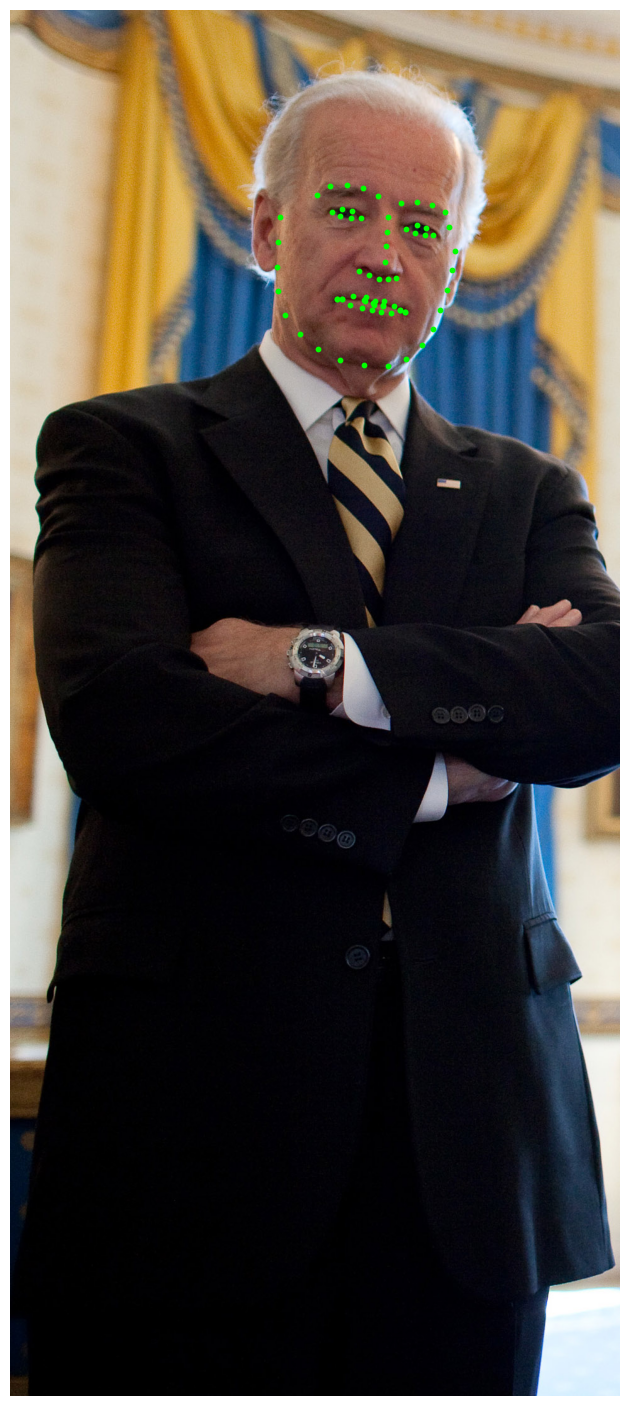

In [19]:
plt.figure(figsize=(30, 18))
plt.imshow(biden_image)
for landmarks in face_landmarks_list:
    for facial_feature, points in landmarks.items():
        x = [p[0] for p in points]
        y = [p[1] for p in points]
        plt.scatter(x, y, s=10, c="lime", label=facial_feature)  # Puntos en color verde lima

plt.axis("off")  # Ocultar los ejes
plt.show()